### 00 . Import packages

In [3]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas_profiling as prof

from sklearn.ensemble import RandomForestClassifier as rfc
from sklearn.metrics import confusion_matrix

### 01 . Import data

I converted the raw rdata file into a pipe-separated text file for python. The rdata files is combined form of all files in train folder, containing raw measurements and their transforamtions.

To get test data, we'll have to combine files in test folder in a simialr fashion. If anyone comes across a difference in these datasets, lets discuss that before moving forward.

In [2]:
data = pd.read_csv('../data/samsungData.txt',sep='|')

### 02 . Profiling

In [3]:
data_profile = prof.ProfileReport(data)

In [4]:
data_profile.to_file('../data_profile.html')

### 03.a. Base RF - with all variables

In [49]:
X = data[data.columns[:-2]]
Y = data.activity
randomState = 42

model0 = rfc(n_estimators=10,random_state=randomState,n_jobs=4,warm_start=True,oob_score=True)
model0 = model0.fit(X, Y)
model0.oob_score_

0.93375952121871597

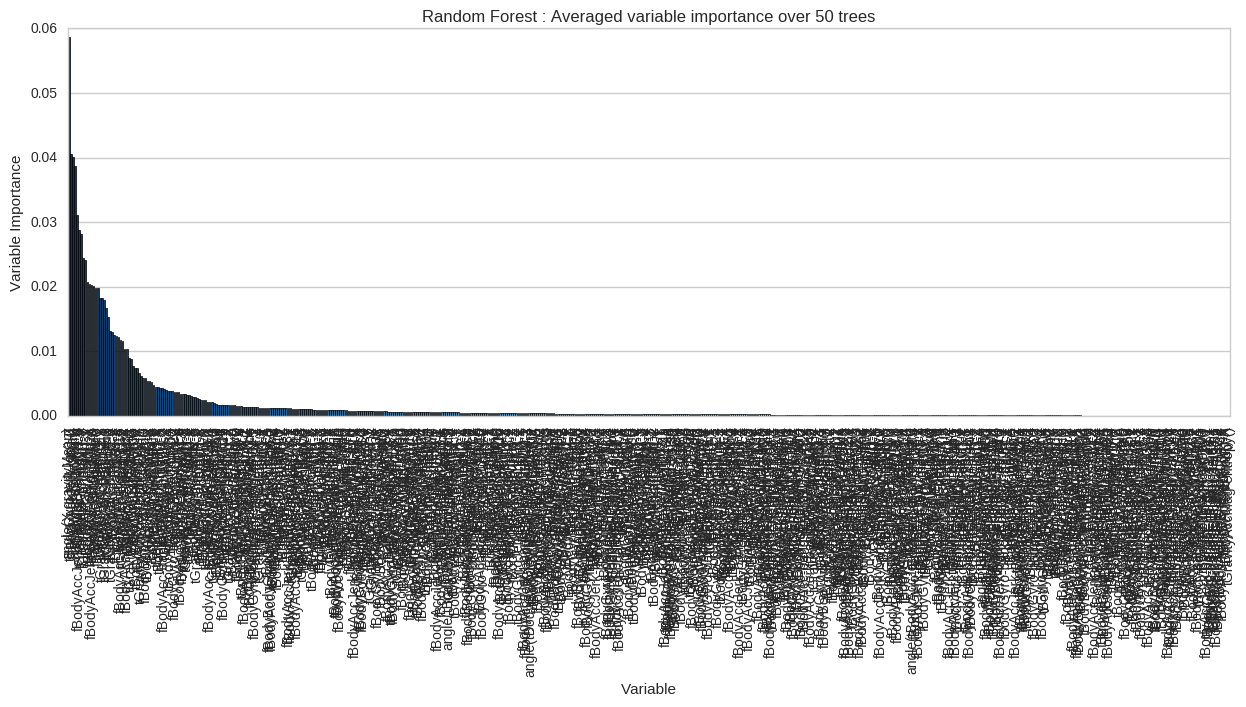

In [50]:
model_vars0 = pd.DataFrame(
             {'variable':X.columns,
              'importance':model0.feature_importances_})

model_vars0.sort_values(by='importance',ascending=False,inplace=True)

sns.plt.figure(figsize=(15,5))
sns.set_style('whitegrid')

sns.barplot(y='importance',
            x='variable',
            data=model_vars0,
            palette=sns.color_palette("Blues_r",
                                      n_colors=len(model_vars0.variable)),
            linewidth=0.5)
sns.plt.xticks(rotation=90)
sns.plt.xlabel('Variable')
sns.plt.ylabel('Variable Importance')
sns.plt.title('Random Forest : Averaged variable importance over 50 trees')

### 03.b. top n variables

In [51]:
n = 25

In [52]:
oobAccuracy = {}

for cols in range(n):
    X = data[[col for col in model_vars0['variable'][:cols+1].values]]
    Y = data.activity
    randomState = 42
    
    model1 = rfc(n_estimators=10,
                 random_state=randomState,
                 n_jobs=4,
                 warm_start=False,
                 oob_score=True)
    model1 = model1.fit(X, Y)
    oobAccuracy[cols+1] = [cols+1,model1.oob_score_]

accuracyTable =pd.DataFrame.from_dict(oobAccuracy).transpose()
accuracyTable.columns = ['variables','oobAccuracy']

(0, 25)

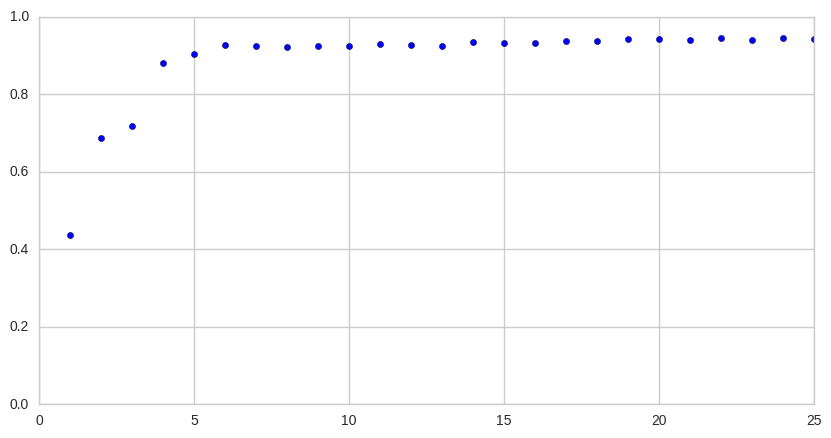

In [53]:
sns.plt.figure(figsize=(10,5))
sns.plt.scatter(accuracyTable.variables,
                y=accuracyTable.oobAccuracy)
sns.plt.ylim((0,1))
sns.plt.xlim((0,n))

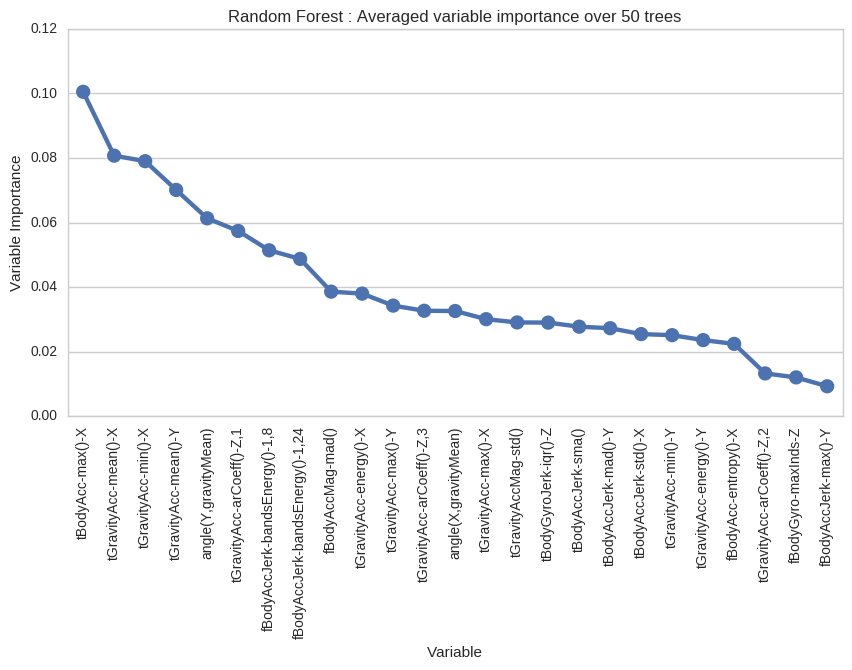

In [54]:
model_vars = pd.DataFrame(
             {'variable':X.columns,
              'importance':model1.feature_importances_})

model_vars.sort_values(by='importance',ascending=False,inplace=True)

sns.plt.figure(figsize=(10,5))


sns.pointplot(y='importance',
              x='variable',
              data=model_vars)
 
sns.plt.xticks(rotation=90)
sns.plt.xlabel('Variable')
sns.plt.ylabel('Variable Importance')
sns.plt.title('Random Forest : Averaged variable importance over 50 trees')

### 03.c. 5 of the top 10 variables

In [55]:
n = 10

In [57]:
cols_model = [col for col in model_vars0['variable'][:n].values]

X = data[cols_model[:5]+[cols_model[9]]]
Y = data.activity
randomState = 42

model2 = rfc(n_estimators=10,
             random_state=randomState,
             n_jobs=4,
             warm_start=False,
             oob_score=True)
model2 = model2.fit(X, Y)
model2.oob_score_

0.90941240478781282

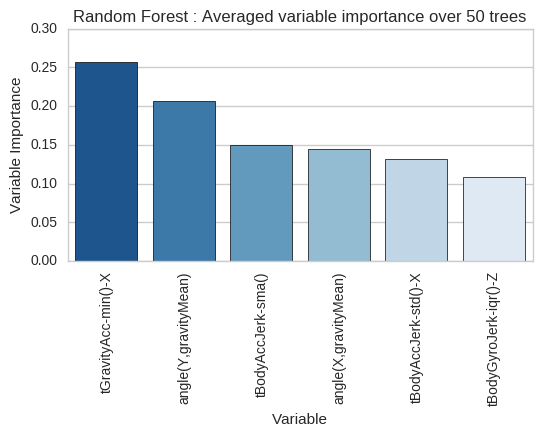

In [58]:
model_vars = pd.DataFrame(
             {'variable':X.columns,
              'importance':model2.feature_importances_})

model_vars.sort_values(by='importance',ascending=False,inplace=True)

sns.plt.figure(figsize=(6,3))


sns.barplot(y='importance',
            x='variable',
            data=model_vars,
            palette=sns.color_palette("Blues_r",
                                      n_colors=len(model_vars.variable)),
            linewidth=0.5)
sns.plt.xticks(rotation=90)
sns.plt.xlabel('Variable')
sns.plt.ylabel('Variable Importance')
sns.plt.title('Random Forest : Averaged variable importance over 50 trees')

In [59]:
confusion_matrix(Y,model2.predict(X))

array([[1407,    0,    0,    0,    0,    0],
       [   0, 1282,    4,    0,    0,    0],
       [   0,    3, 1371,    0,    0,    0],
       [   0,    0,    0, 1221,    2,    3],
       [   0,    0,    0,    8,  977,    1],
       [   0,    0,    0,    0,    0, 1073]])